In [12]:
# bibliotecas necessarias para a parte de transformação e limpeza do projeto
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# importando os dados
df = pd.read_csv("processed_data/imdb_processed_data.csv", delimiter=";")
display(df)

,id,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000002,SHORT,LE CLOWN ET SES CHIENS,LE CLOWN ET SES CHIENS,0,1892.0,NaN,5.0,"ANIMATION,SHORT",6.0,233.0
1,tt0000004,SHORT,UN BON BOCK,UN BON BOCK,0,1892.0,NaN,12.0,"ANIMATION,SHORT",6.1,152.0
2,tt0000008,SHORT,EDISON KINETOSCOPIC RECORD OF A SNEEZE,EDISON KINETOSCOPIC RECORD OF A SNEEZE,0,1894.0,NaN,1.0,"DOCUMENTARY,SHORT",5.5,1965.0
3,tt0000015,SHORT,AUTOUR D'UNE CABINE,AUTOUR D'UNE CABINE,0,1894.0,NaN,2.0,"ANIMATION,SHORT",6.2,947.0
4,tt0000017,SHORT,ITALIENISCHER BAUERNTANZ,ITALIENISCHER BAUERNTANZ,0,1895.0,NaN,1.0,"DOCUMENTARY,SHORT",4.6,292.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,tt7804296,TVEPISODE,28TH DECEMBER 2017 LATE NEWS,28TH DECEMBER 2017 LATE NEWS,0,2017.0,NaN,NaN,NEWS,NaN,NaN
1996,tt7804310,TVEPISODE,EITELKEITEN,EITELKEITEN,0,1985.0,NaN,NaN,FAMILY,NaN,NaN
1997,tt7804320,TVEPISODE,EPISODE #1.7,EPISODE #1.7,0,2017.0,NaN,NaN,DRAMA,NaN,NaN
1998,tt7804336,VIDEO,SEX MACHINE,SEX MACHINE,1,1995.0,NaN,60.0,ADULT,2.7,6.0


Com um .describe() e .corr() podemos ver alguns dados interessantes dentro do dataframe para ser um ponto inicial em nossa análise:

In [38]:
correlation_matrix = df[['startYear', 'runtimeMinutes', 'averageRating', 'numVotes']].corr()
print("Matriz de Correlação:")
print(correlation_matrix)

Matriz de Correlação:
                startYear  runtimeMinutes  averageRating  numVotes
startYear        1.000000        0.255751       0.612617  0.010072
runtimeMinutes   0.255751        1.000000       0.186727  0.049964
averageRating    0.612617        0.186727       1.000000  0.087983
numVotes         0.010072        0.049964       0.087983  1.000000


Vemos que a maior correlação entre as colunas está entre a coluna startYear e a coluna avarageRating. Mais adiante utilizaremos essa informação. O restante não é relevante para nossa análise.

In [14]:
df.describe()

,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
count,2000.000000,1684.000000,24.000000,587.000000,326.000000,326.000000
mean,0.048500,1992.809976,2008.666667,31.872232,6.477301,210.917178
std,0.214874,37.993473,13.222730,36.252419,1.382653,1123.662888
min,0.000000,1892.000000,1972.000000,1.000000,2.700000,5.000000
25%,0.000000,1990.000000,2005.000000,10.000000,5.500000,13.000000
50%,0.000000,2010.000000,2014.500000,21.000000,6.450000,27.000000
75%,0.000000,2016.000000,2017.250000,43.000000,7.500000,105.500000
max,1.000000,2021.000000,2020.000000,302.000000,9.800000,18983.000000


Vemos que existem títulos dentro do dataframe que foram lançados de 1892 até 2021. Podemos tirar mais informações do dataframe a partir desses dados. Além disso, também temos o ano "final" - que existe para séries, provavelmente.

Porém, para entender ainda melhor o dataframe, veremos quais os tipos de títulos que existem dentro dele, assim, poderemos analisá-lo de uma forma mais profunda.

In [23]:
# descobrindo os tipos de titulos existentes no dataframe
distinct_types = df['titleType'].drop_duplicates()
distinct_types.head(10)

0              SHORT
66             MOVIE
236        TVEPISODE
241         TVSERIES
246          TVMOVIE
262            VIDEO
263        TVSPECIAL
272     TVMINISERIES
275          TVSHORT
1512       VIDEOGAME
Name: titleType, dtype: object

Ao entender que existem vários tipos de títulos, podemos fazer uma contagem de quantos títulos cada tipo tem dentro do dataframe. Com essas informações já conseguimos plotar um gráfico para melhorar nossa visualização:

In [16]:
count_types = df['titleType'].value_counts()
print(count_types)

titleType
TVEPISODE       1341
SHORT            397
MOVIE             97
VIDEO             65
TVSERIES          57
TVMOVIE           20
TVSPECIAL          8
TVMINISERIES       6
VIDEOGAME          5
TVSHORT            4
Name: count, dtype: int64


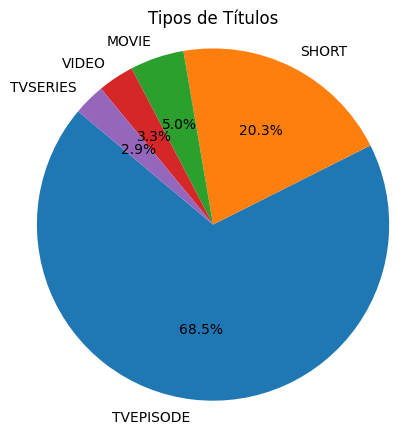

In [24]:
# pelos números retornados, pegaremos apenas os 6 mais recorrentes para plotar o gráfico e ter uma boa visualização
count_types_top6 = count_types.head(5)

plt.figure(figsize=(5, 5))
plt.pie(count_types_top6, labels=count_types_top6.index, autopct='%1.1f%%', startangle=140)
plt.title('Tipos de Títulos')
plt.axis('equal')
plt.show()

Conseguimos ver que os episódios são os mais recorrentes dentro do dataframe. Provavelmente são episódios de séries de TV, que também existem na contagem. Logo após temos os curtas, que também tem uma grande quantidade em comparação aos outros tipos de títulos. Porém, temos que lembrar que essa base é apenas uma amostra da base original, que pode não retratar a realidade da origem.

Faremos essa mesma análise com os anos existentes no dataframe, para conseguirmos entender quais anos foram mais recorrentes dentro do dataframe e tentar entender o motivo. Para isso, utilizaremos a coluna 'startYear':

In [18]:
count_years = df['startYear'].value_counts()
count_years.head(10)

startYear
2013.0    163
2016.0    136
2009.0    104
2019.0    104
2010.0     96
2018.0     77
1911.0     69
2017.0     62
2020.0     59
2008.0     57
Name: count, dtype: int64

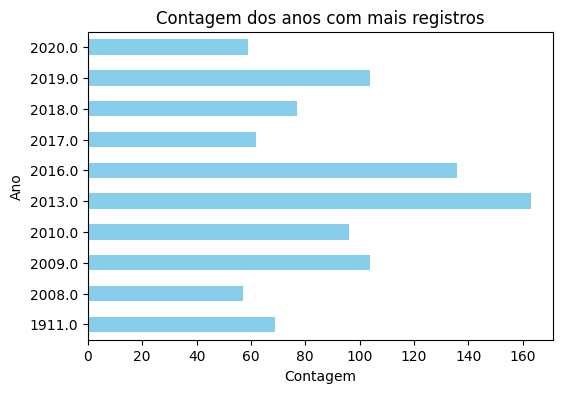

In [19]:
count_years_top10 = count_years.head(10).sort_index(ascending=True)

# criando um gráfico de barras horizontais para conseguir visualizar melhor os resultados
plt.figure(figsize=(6, 4))
count_years_top10.plot(kind='barh', color='skyblue')
plt.title('Contagem dos anos com mais registros')
plt.xlabel('Contagem')
plt.ylabel('Ano')
plt.show()

In [25]:
# calculando a porcentagem de cada ano dentro do df
porcentagem = (count_years / len(df)) * 100
porcentagem.head(10)

startYear
2013.0    8.15
2016.0    6.80
2009.0    5.20
2019.0    5.20
2010.0    4.80
2018.0    3.85
1911.0    3.45
2017.0    3.10
2020.0    2.95
2008.0    2.85
Name: count, dtype: float64

Acima podemos ver que, dos 10 anos com mais recorrencia de titulos, 9 são anos mais recentes - com menos de 20 anos. Apenas 3.45% dos dez anos mais recorrentes estão fora dessa época. Isso pode se dar, talvez, por conta da valorização midiatica e o uso da internet, onde o acesso para esses títulos fica muito mais simples.

Agora utilizaremos a questão da correlação entre as colunas startYear e avarageRating parar tirar mais algumas informações dessas colunas. Separaremos os anos existentes por décadas e, a partir disso, calcularemos a média de cada década existente no dataframe:

In [39]:
# Calculando a década de lançamento de cada filme
df_decade = df
df_decade['decade'] = (df_decade['startYear'] // 10) * 10
df.groupby('decade')['averageRating'].mean()

decade
1890.0    4.796429
1900.0    5.660417
1910.0    5.356410
1920.0         NaN
1930.0         NaN
1940.0         NaN
1950.0         NaN
1960.0    7.550000
1970.0    7.900000
1980.0    7.175000
1990.0    6.715385
2000.0    6.654167
2010.0    7.147712
2020.0    7.457143
Name: averageRating, dtype: float64

É interessante perceber um aumento na média dos títulos a partir da década de 60 até a década de 80. Isso pode se dar por um efeito "nostalgia" que os espectadores têm ao consumir esses títulos. 

Títulos a partir da década de 2010 também voltam a ter uma média maior - provavelmente por conta da repercussão, qualidade e mudanças na indústria cinematográfica.

Também podemos analisar o titulo com maior número de votos, com o número máximo que foi encontrado atraves do .describe no inicio na análise. Com isso, podemos entender melhor as motivações dessa quantidade de votos:

In [20]:
df.loc[df['numVotes'] == 18983]

,id,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
839,tt13776714,TVEPISODE,PREVIOUSLY ON,PREVIOUSLY ON,0,2021.0,NaN,47.0,"ACTION,COMEDY,DRAMA",9.0,18983.0


O registro encontrado é um episódio da série WandaVision, da Marvel. Podemos entender a quantidade de votos por conta do sucesso que a série teve na internet e fora dela. Infelizmente, essa base não retorna registros com o nome 'WANDAVISION' para conseguirmos ver a quantidade de votos da serie completa.

Também podemos checar quantos títulos dentro do nosso dataframe são adultos:

In [30]:
is_adult = df['isAdult'].value_counts()
is_adult.head()

isAdult
0    1903
1      97
Name: count, dtype: int64

In [31]:
porcentagem_adult = (is_adult / len(df)) * 100
porcentagem_adult.head()

isAdult
0    95.15
1     4.85
Name: count, dtype: float64

Com 0 sendo classificação normal e 1 para adultos, conseguimos ter a noção que menos de 5% do nosso dataframe retornam títulos que são indicados para adultos, provavelmente com classificação +18. Daremos uma olhada no tipo de título esses filmes se encaixam:

In [36]:
df_adult = df.loc[df['isAdult'] == 1]
df_adult['titleType'].value_counts()

titleType
TVEPISODE    76
VIDEO        20
TVSERIES      1
Name: count, dtype: int64

Percebemos que muitos desses títulos vem de episódios de TV, o que podem se encaixar em séries e/ou programas adultos. Nosso dataframe não retorna nenhum filme com essa classificação.

Para finalizar a análise do nosso dataframe, sabemos que a coluna 'genres' também existe entre os registros, e que ela retorna os gêneros de cada título. Seria interessante sabermos qual dos gêneros é o mais frenquente, porém, para isso teremos que fazer um split nos registros da coluna genres, já que muitos retornam mais de um gênero separado por vírgula:

In [21]:
df_genres = df['genres'].str.split(',', expand=True)
count_genres = df_genres.stack().value_counts()

count_genres.head(10)

SHORT          468
DRAMA          426
COMEDY         382
TALK-SHOW      234
DOCUMENTARY    190
NEWS           171
ROMANCE        129
FAMILY         120
ADVENTURE      118
ANIMATION      117
Name: count, dtype: int64

Após o gênero "curta", temos drama e comédia, que são gêneros mais clássicos. Muitas vezes, eles vem acompanhados de outros gêneros, e, por esse motivo, podem vir a aparecer mais do que outros. 

Sabendo quais são os gêneros com mais recorrência dentro do dataframe, podemos fazer uma média de notas, a variância e saber também qual seria a menor e maior nota de cada um dos gêneros, para isso, faremos uma função que pode nos ajudar a extrair essas informações dos nossos dados. Utilizaremos os cinco primeiros gêneros - Curta, Drama, Comédia, Talk-Show e Documentário:

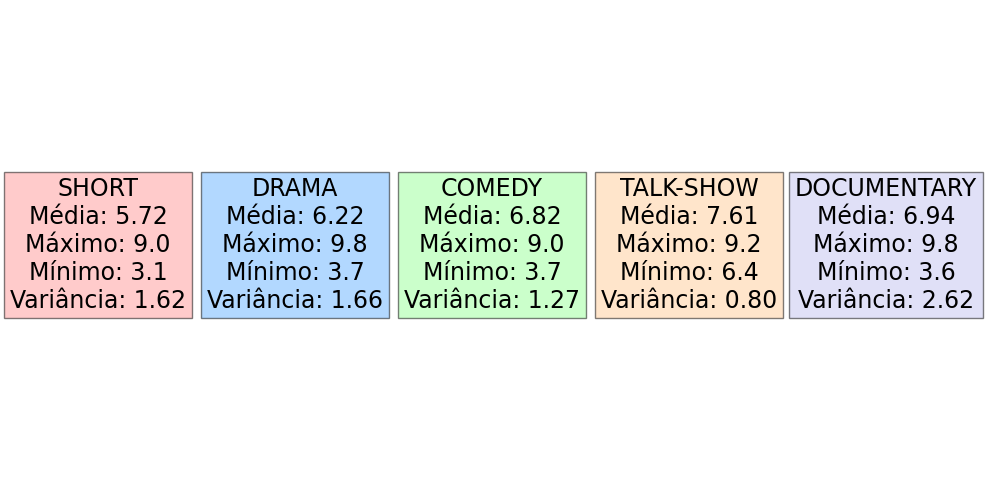

In [27]:
df_genres = df.assign(genres=df['genres'].str.split(',')).explode('genres')

def get_statistics_genre(dataframe, genre):
    # procurando o genero na coluna
    df_genre = dataframe[dataframe['genres'].str.contains(genre, na=False)]
    
    # calculando estatisticas
    mean = df_genre['averageRating'].mean()
    max = df_genre['averageRating'].max()
    min = df_genre['averageRating'].min()
    var = df_genre['averageRating'].var()
    
    return mean, max, min, var

genres = ['SHORT', 'DRAMA', 'COMEDY', 'TALK-SHOW', 'DOCUMENTARY']
statistics = {}

for genre in genres:
    mean_rating, max_rating, min_rating, variance_rating = get_statistics_genre(df_genres, genre)
    statistics[genre] = {'mean_rating': mean_rating, 
                         'max_rating': max_rating, 
                         'min_rating': min_rating, 
                         'variance_rating': variance_rating}

fig, axs = plt.subplots(1, len(statistics), figsize=(10, 5))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
for ax, (genre, stats), color in zip(axs, statistics.items(), colors):
    ax.text(0.5, 0.5, f"{genre}\nMédia: {stats['mean_rating']:.2f}\nMáximo: {stats['max_rating']:.1f}\nMínimo: {stats['min_rating']:.1f}\nVariância: {stats['variance_rating']:.2f}",
            horizontalalignment='center', 
            verticalalignment='center', 
            fontsize=17, bbox=dict(facecolor=color, alpha=0.5))
    ax.axis('off')

plt.tight_layout()
plt.show()

Ao olhar os resultados, conseguimos encontrar informações relevantes. A maior nota entre os gêneros é de 9.8, encontrada em títulos de Drama e Documentário - talvez essa nota pode se dar à seriedade dos gêneros, que geralmente abordam assuntos mais sérios. Já a menor nota fica com o gênero de curta - o que não podemos analisar muito bem, já que esse gênero é muito abrangente. 

Mas, a questão de abrangência do gênero também pode ser analisada dentro da variância: o gênero documentário tem a maior variância de notas, justamente pela abrangência de conteúdo existente para esse gênero - podemos ter um documetário biográfico, sobre crimes, experimentos ou até sobre bichinhos. Isso pode causar uma divergência de notas e, consequentemente, a variância ser maior. Já com Talk-Show, que é um gênero mais nichado e atinge um público especifico, temos as "melhores" notas, por assim dizer: baixa variância, a melhor média entre os cinco gêneros e uma boa nota mínima. 

Os gêneros Drama e Comédia, por sua vez, trazem informações bem parecidas. Talvez por serem gêneros que não são tão nichados e atingirem um público maior. Então, acabam "entrando na média" em todas os pontos.

Com isso, termino a análise desse dataframe. Conseguiriamos tirar mais informações do mesmo a partir dessas notas finais que encontramos, mas deixarei para uma análise futura. 

Atualmente, estou analisando o mesmo dataframe (porém completo) com Pyspark, e, conseguimos encontrar informações bem relevantes também. Como o Pandas é mais limitado, acabei decidindo por pegar apenas uma amostra do mesmo, onde já deu para ter uma noção das informações que podem ser encontradas dentro do mesmo.